Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


C:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.4322 - loss: 1.1818 - val_accuracy: 0.5367 - val_loss: 1.6541
Epoch 2/10
  1/178 ━━━━━━━━━━━━━━━━━━━━ 1:46 601ms/step - accuracy: 0.6875 - loss: 0.7721

C:\anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6875 - loss: 0.7721 - val_accuracy: 0.7097 - val_loss: 0.8561
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.6735 - loss: 0.7871 - val_accuracy: 0.6328 - val_loss: 1.1992
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8125 - loss: 0.5309 - val_accuracy: 0.8387 - val_loss: 0.4404
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 152s 831ms/step - accuracy: 0.7163 - loss: 0.7036 - val_accuracy: 0.5477 - val_loss: 1.4959
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7812 - loss: 0.6901 - val_accuracy: 0.6774 - val_loss: 0.8614
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 16648s 94s/step - accuracy: 0.7369 - loss: 0.6537 - val_accuracy: 0.7578 - val_loss: 0.6842
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6875 - loss: 0.6138 - val_accuracy: 0.9355 - val_loss: 0.2559
Epoch 9/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.7684 - loss: 0.5858 - val_accuracy: 0.7

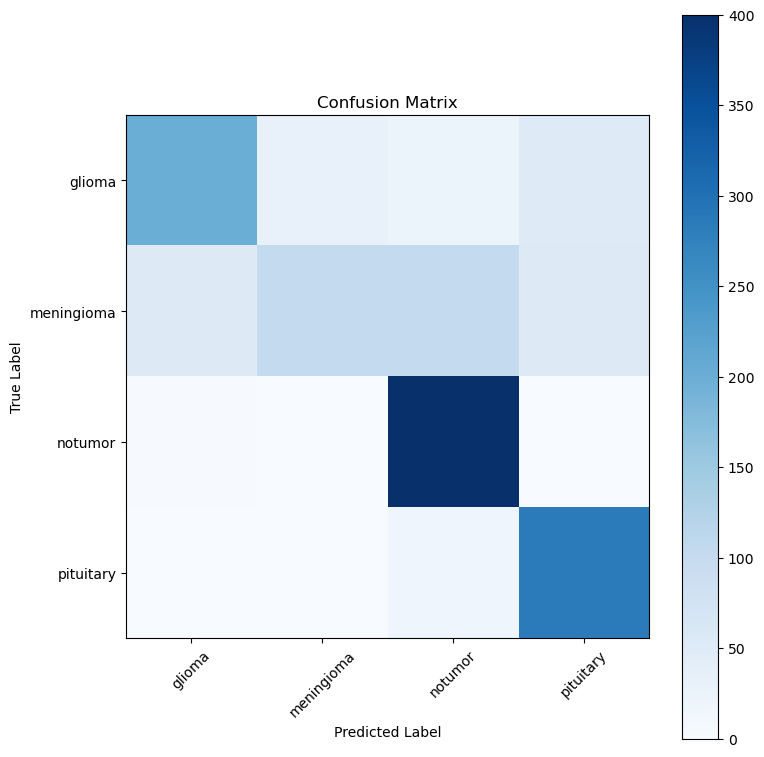

In [1]:
#A1
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define paths for training and testing datasets
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32
input_shape = (img_width, img_height, 3)

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True)

# Only rescale for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_width, img_height),
                                                  batch_size=batch_size, class_mode='categorical', shuffle=False)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 categories for classification
])

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator, 
                    steps_per_epoch=train_generator.samples // batch_size, 
                    validation_steps=test_generator.samples // batch_size)

# Predict the classes on the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix')
print(cm)

# Classification report for precision, recall, F1-score
target_names = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=target_names)
print('Classification Report')
print(report)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")

    print(cm)

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

# Plot confusion matrix for visualization
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cm, classes=target_names)
plt.show()


In [1]:
#A2
import os
import numpy as np
from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt

# Define paths to training and testing data
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'

# Define classes (subfolders in the directories)
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Initialize lists to hold feature data (width, height) and labels
X_train = []
y_train = []
X_test = []
y_test = []

def extract_image_features(image_path):
    img = Image.open(image_path)
    img = img.resize((150, 150))  # Resize to a fixed size
    width, height = img.size
    return width, height

# Process training images
for label, class_name in enumerate(classes):
    class_dir = os.path.join(train_dir, class_name)
    images = os.listdir(class_dir)
    
    for image_name in images:
        image_path = os.path.join(class_dir, image_name)
        width, height = extract_image_features(image_path)
        X_train.append([width, height])  # Use width and height as features
        y_train.append(label)

# Process testing images
for label, class_name in enumerate(classes):
    class_dir = os.path.join(test_dir, class_name)
    images = os.listdir(class_dir)
    
    for image_name in images:
        image_path = os.path.join(class_dir, image_name)
        width, height = extract_image_features(image_path)
        X_test.append([width, height])  # Use width and height as features
        y_test.append(label)

# Convert lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
reg = LinearRegression().fit(X_train_scaled, y_train)

# Predict on training and testing data
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)

# Calculate metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\nTesting Metrics:")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R²: {r2_test:.4f}")


Training Metrics:
MSE: 1.2193
RMSE: 1.1042
MAPE: 1622841859140475.7500
R²: 0.0000

Testing Metrics:
MSE: 1.1643
RMSE: 1.0790
MAPE: 1605758188774262.7500
R²: -0.0004


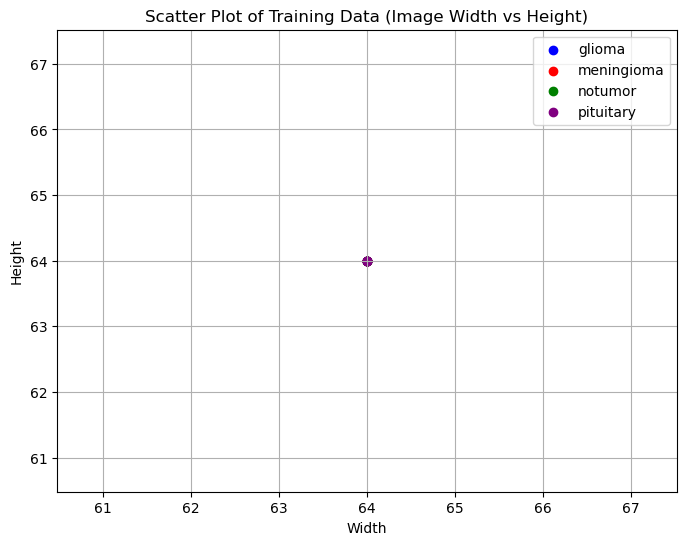

In [2]:
#A3
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

# Path to training data (update this path based on your setup)
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'

# Define the classes (subfolders in the training directory)
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Initialize lists to hold feature data (X, Y) and labels
X_data = []
Y_data = []
labels = []

# Function to extract image size as features (X and Y)
def extract_image_features(image_path):
    img = Image.open(image_path)
    img = img.resize((64, 64))  # Resize to a fixed size (optional)
    width, height = img.size  # Take width and height as features
    return width, height

# Iterate through classes and images in the training directory
for label, class_name in enumerate(classes):
    class_dir = os.path.join(train_dir, class_name)
    images = os.listdir(class_dir)
    
    # Select 5 random images from each class (to make 20 data points)
    selected_images = random.sample(images, 5)
    
    for image_name in selected_images:
        image_path = os.path.join(class_dir, image_name)
        width, height = extract_image_features(image_path)
        X_data.append(width)
        Y_data.append(height)
        labels.append(label)

# Convert lists to NumPy arrays for easier handling
X_data = np.array(X_data)
Y_data = np.array(Y_data)
labels = np.array(labels)

# Plotting the data
plt.figure(figsize=(8, 6))

# Define colors for each class
colors = ['blue', 'red', 'green', 'purple']

# Scatter plot with class-specific colors
for class_value, color, label_name in zip(range(len(classes)), colors, classes):
    plt.scatter(X_data[labels == class_value], Y_data[labels == class_value], 
                color=color, label=label_name)

plt.title('Scatter Plot of Training Data (Image Width vs Height)')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend()
plt.grid(True)
plt.show()

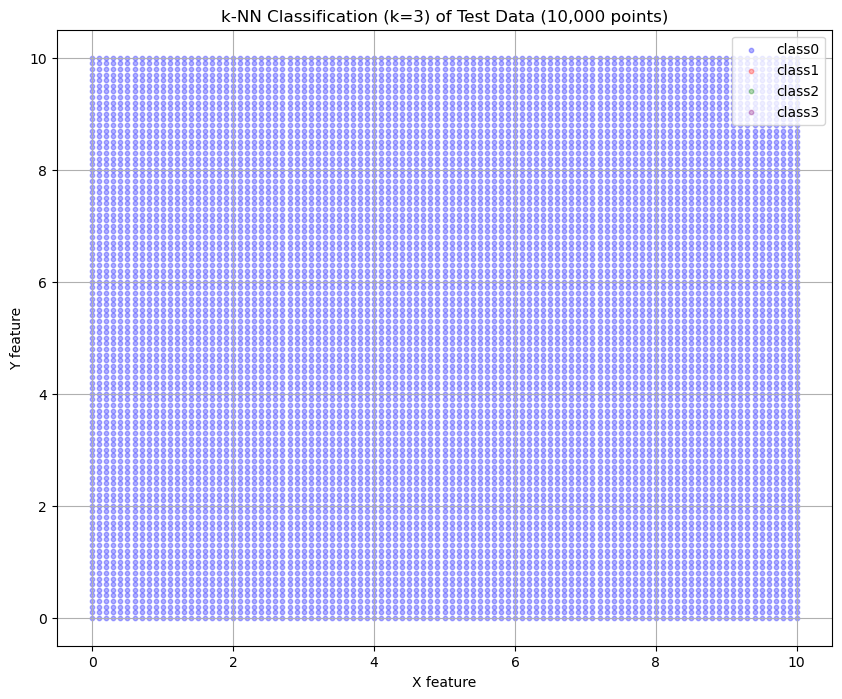

In [3]:
#A4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image
import os
import random

# Path to training data (update this path based on your setup)
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'

# Define the classes (subfolders in the training directory)
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Initialize lists to hold feature data (X, Y) and labels
X_train = []
Y_train = []
labels = []

# Function to extract image size as features (X and Y)
def extract_image_features(image_path):
    img = Image.open(image_path)
    img = img.resize((64, 64))  # Resize to a fixed size (optional)
    width, height = img.size  # Take width and height as features
    return width, height

# Iterate through classes and images in the training directory
for label, class_name in enumerate(classes):
    class_dir = os.path.join(train_dir, class_name)
    images = os.listdir(class_dir)
    
    # Select 5 random images from each class (to create a sample training set)
    selected_images = random.sample(images, 5)
    
    for image_name in selected_images:
        image_path = os.path.join(class_dir, image_name)
        width, height = extract_image_features(image_path)
        X_train.append(width)
        Y_train.append(height)
        labels.append(label)

# Convert lists to NumPy arrays for easier handling
X_train = np.array(X_train)
Y_train = np.array(Y_train)
labels = np.array(labels)

# Prepare the training data
train_data = np.column_stack((X_train, Y_train))

# Step 1: Generate test set data with X, Y values between 0 and 10 with increments of 0.1
x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test, y_test)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))  # Flatten the meshgrid into test data points

# Step 2: Train the kNN classifier (k=3)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_data, labels)

# Step 3: Classify the test data points
predictions = knn.predict(test_data)

# Step 4: Plot the test data colored by predicted class
plt.figure(figsize=(10, 8))

# Define colors for each class
colors = ['blue', 'red', 'green', 'purple']

# Plot the test points based on their predicted class
for class_value, color in zip(range(len(classes)), colors):
    plt.scatter(test_data[predictions == class_value][:, 0], 
                test_data[predictions == class_value][:, 1], 
                color=color, label=f'class{class_value}', alpha=0.3, s=10)

plt.title(f'k-NN Classification (k={k}) of Test Data (10,000 points)')
plt.xlabel('X feature')
plt.ylabel('Y feature')
plt.legend()
plt.grid(True)
plt.show()

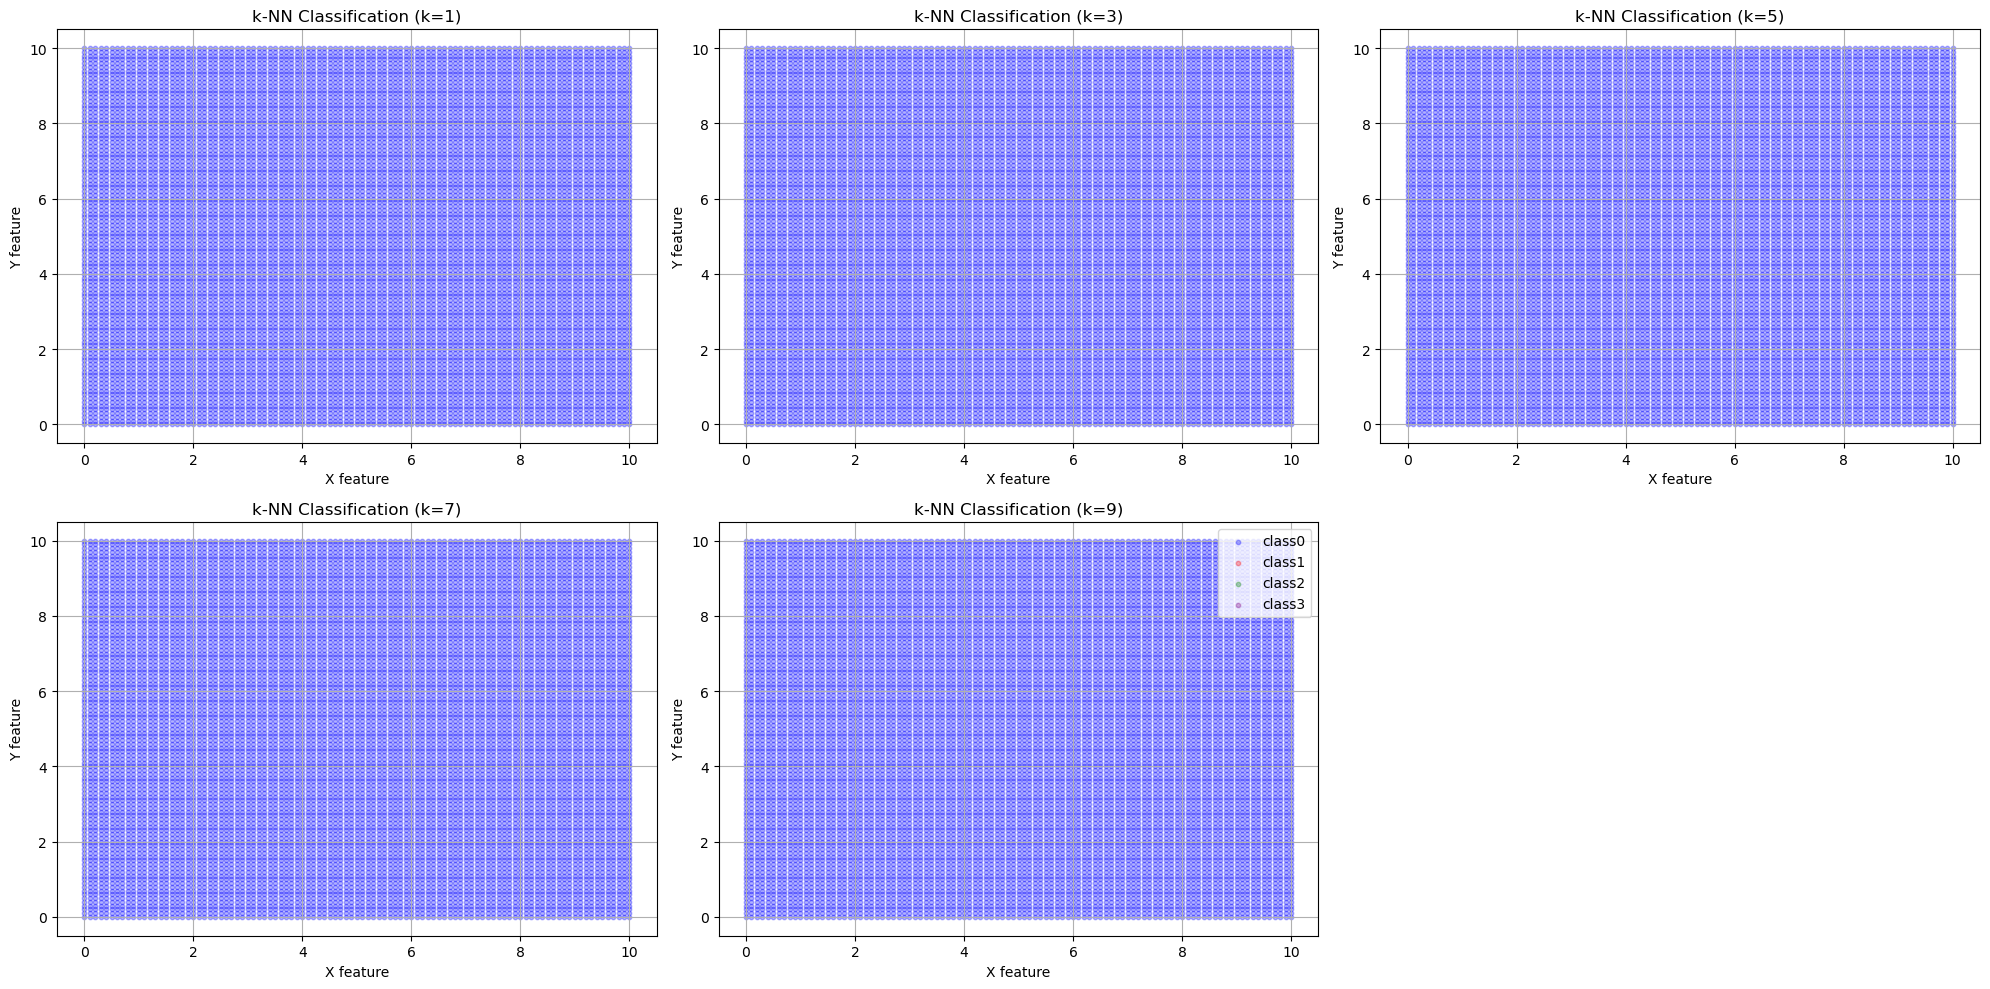

In [6]:
#A5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image
import os
import random

# Path to training data (update this path based on your setup)
train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'

# Define the classes (subfolders in the training directory)
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Initialize lists to hold feature data (X, Y) and labels
X_train = []
Y_train = []
labels = []

# Function to extract image size as features (X and Y)
def extract_image_features(image_path):
    img = Image.open(image_path)
    img = img.resize((64, 64))  # Resize to a fixed size (optional)
    width, height = img.size  # Take width and height as features
    return width, height

# Iterate through classes and images in the training directory
for label, class_name in enumerate(classes):
    class_dir = os.path.join(train_dir, class_name)
    images = os.listdir(class_dir)
    
    # Select 5 random images from each class (to create a sample training set)
    selected_images = random.sample(images, 5)
    
    for image_name in selected_images:
        image_path = os.path.join(class_dir, image_name)
        width, height = extract_image_features(image_path)
        X_train.append(width)
        Y_train.append(height)
        labels.append(label)

# Convert lists to NumPy arrays for easier handling
X_train = np.array(X_train)
Y_train = np.array(Y_train)
labels = np.array(labels)

# Prepare the training data
train_data = np.column_stack((X_train, Y_train))

# Step 1: Generate test set data with X, Y values between 0 and 10 with increments of 0.1
x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test, y_test)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))  # Flatten the meshgrid into test data points

# Define k values to experiment with
k_values = [1, 3, 5, 7, 9]

# Define colors for each class
colors = ['blue', 'red', 'green', 'purple']

# Determine subplot grid dimensions
num_k_values = len(k_values)
num_cols = 3  # Number of columns for subplots
num_rows = int(np.ceil(num_k_values / num_cols))  # Calculate the number of rows needed

# Plot the results for each value of k
plt.figure(figsize=(20, 10))
for i, k in enumerate(k_values):
    # Step 2: Train the kNN classifier with current k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, labels)

    # Step 3: Classify the test data points
    predictions = knn.predict(test_data)

    # Step 4: Plot the test data colored by predicted class
    plt.subplot(num_rows, num_cols, i + 1)
    for class_value, color in zip(range(len(classes)), colors):
        plt.scatter(test_data[predictions == class_value][:, 0], 
                    test_data[predictions == class_value][:, 1], 
                    color=color, label=f'class{class_value}', alpha=0.3, s=10)

    plt.title(f'k-NN Classification (k={k})')
    plt.xlabel('X feature')
    plt.ylabel('Y feature')
    plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()
